In [1]:
import os
import sys
import pandas as pd
import googletrans
from googletrans import Translator
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
ROOT_PATH = os.path.abspath(os.getcwd())
CALPI = "calpi"
SETTELMENT = "settelments"

def get_data(agg_type, num):
    """returns dataframe of the requested csv
    
    parameters
    ----------
    agg_type - aggregation type of the csv needed
    num - election number
    
    return
    ------
    DataFrame
    """
    if type(num) is not str:
        num = str(num)
    
    
    path = os.path.join(ROOT_PATH,num+agg_type+".xlsx")
    return pd.read_excel(path,dtype=object)

def remove_small_parties(df,threshold):
    """remove parties that didnt pass the threshold"""
    
    for column in df.columns[7:]:
            if df[column].sum() < threshold:
                   df = df.drop(column,axis=1)
    return df

def normalize_to_voting_ratios(df):
    """normalizing the votes according to proportion of votes per party"""
    
    for i,r in df.iterrows():
        for c in df.columns[7:]:
            x = r[c]/r['valid votes']
            df.at[i , c]=x

    return df

def total_voters(df):
    dict={}
    for c in df.columns[7:]:
        dict[c]=(df[c].sum()/df['valid votes'].sum())*100
    plt.figure(figsize=(20,10))
    plt.bar(range(len(dict)), list(dict.values()), align='center')
    plt.ylabel('Voter turnout')
    plt.xlabel('Parties')
    plt.xticks(range(len(dict)), list(dict.keys()))
    plt.show()

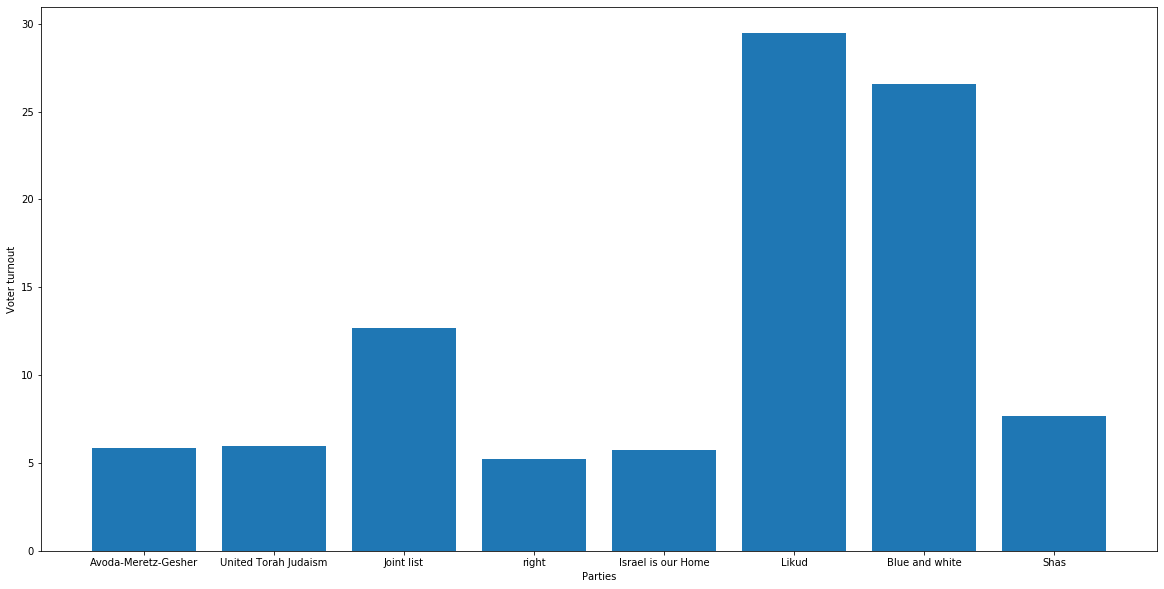

,committee code,code,name,Holders of voting rights,Voters,Disqualified,valid votes,Avoda-Meretz-Gesher,United Torah Judaism,Joint list,right,Israel is our Home,Likud,Blue and white,Shas
0,18,967,ABU JUWEI'ID,2018,595,6,589,0.0220713,0,0.940577,0,0.00169779,0.00679117,0.0135823,0.00339559
1,2,472,ABU GHOSH,4821,2718,36,2682,0.0279642,0.00149142,0.804251,0.00186428,0.00186428,0.1044,0.0458613,0.00521999
2,6,473,ABU SINAN,9422,6090,53,6037,0.0152394,0.000993871,0.738446,0.00265032,0.0380984,0.0314726,0.124565,0.0409144
3,18,958,ABU ABDUN,142,41,1,40,0,0,1,0,0,0,0,0
4,18,968,ABU QUREINAT,3037,1336,8,1328,0.00677711,0,0.951054,0.000753012,0,0.0060241,0.0248494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,18,665,TEQUMA,488,416,2,414,0.0120773,0.0120773,0,0.39372,0.00241546,0.388889,0.152174,0.0289855
1210,2,3563,TEQOA,2158,1619,4,1615,0.0173375,0.0204334,0.00185759,0.470588,0.0216718,0.360991,0.0526316,0.0210526
1211,18,970,TARABIN AS-SANI,520,48,0,48,0,0,0.895833,0,0,0,0.0833333,0
1212,18,1346,TARABIN AS-SANI,587,206,0,206,0,0,0.776699,0,0,0.194175,0.00970874,0


In [32]:
df = get_data(SETTELMENT,23)
df = remove_small_parties(df,135720)
total_voters(df)
df = normalize_to_voting_ratios(df)
df

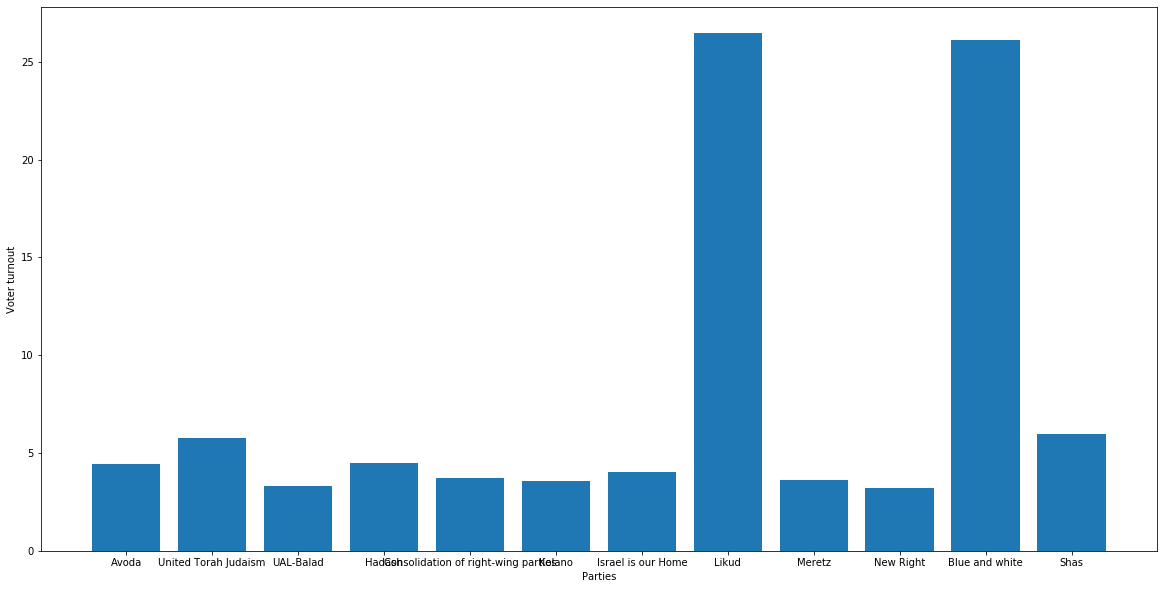

,committee code,code,name,Holders of voting rights,Voters,Disqualified,valid votes,Avoda,United Torah Judaism,UAL-Balad,Hadash,Consolidation of right-wing parties,Kolano,Israel is our Home,Likud,Meretz,New Right,Blue and white,Shas
0,17,7,SHAHAR,516,371,0,371,0.0458221,0.00539084,0,0,0.00808625,0.0566038,0.0134771,0.380054,0.0242588,0.0619946,0.266846,0.0889488
1,2,10,TIROSH,333,237,2,235,0.0170213,0.012766,0,0,0.0425532,0.0382979,0,0.52766,0.00425532,0.0170213,0.0212766,0.310638
2,17,11,NIR HEN,403,289,1,288,0.0729167,0,0,0,0.0138889,0.0486111,0.00694444,0.291667,0.0347222,0.0590278,0.385417,0.00694444
3,18,13,HAZEVA,502,403,0,403,0.109181,0.00496278,0,0,0.0124069,0.0173697,0.00248139,0.0645161,0.0421836,0.0521092,0.620347,0.00496278
4,17,15,NO'AM,302,217,2,215,0.00465116,0.0186047,0,0,0.0232558,0.00930233,0,0.767442,0,0.00465116,0.0232558,0.116279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,8,9500,QIRYAT BIALIK,34220,22168,157,22011,0.0420244,0.00972241,0.000136295,0.000408886,0.00758712,0.0575621,0.0697833,0.345736,0.0141747,0.0202172,0.348962,0.0213984
1210,8,9600,QIRYAT YAM,36506,21114,227,20887,0.0215445,0.00588883,0.000335137,0.00028726,0.0115862,0.0557284,0.166515,0.42007,0.00684636,0.0173314,0.206444,0.0261885
1211,19,9700,HOD HASHARON,45512,34904,104,34800,0.0762069,0.00442529,0.000172414,0.00109195,0.00864943,0.0291667,0.0118103,0.204511,0.0457184,0.0200287,0.536063,0.0159483
1212,9,9800,BINYAMINA-GIV'AT ADA,10073,7652,27,7625,0.0977049,0.00170492,0.000786885,0.00236066,0.012459,0.0245246,0.00708197,0.183213,0.0688525,0.0313443,0.507934,0.0102295


In [33]:
df1 = get_data(SETTELMENT,21)
df1 = remove_small_parties(df1,135720)
total_voters(df1)
df1 = normalize_to_voting_ratios(df1)
df1

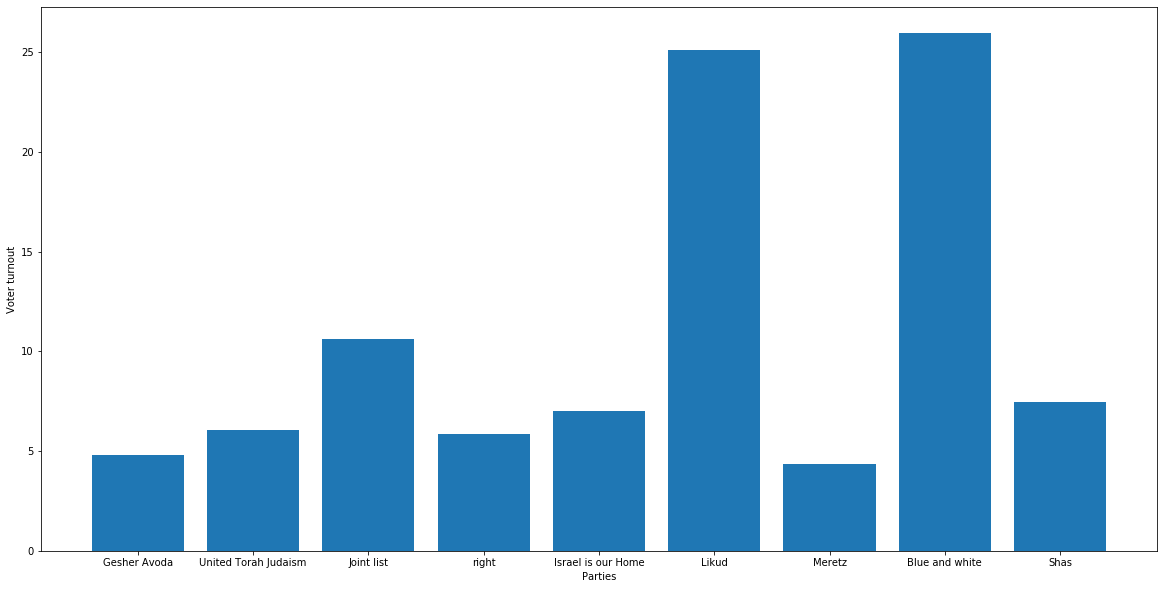

,committee code,code,name,Holders of voting rights,Voters,Disqualified,valid votes,Gesher Avoda,United Torah Judaism,Joint list,right,Israel is our Home,Likud,Meretz,Blue and white,Shas
0,17,7,SHAHAR,517,377,0,377,0.0822281,0.0212202,0,0.0742706,0.0291777,0.339523,0.0344828,0.259947,0.103448
1,2,10,TIROSH,332,245,0,245,0.00408163,0.0163265,0,0.044898,0,0.379592,0.00408163,0.0244898,0.42449
2,17,11,NIR HEN,406,287,0,287,0.111498,0.00348432,0.00348432,0.0452962,0.0348432,0.198606,0.0174216,0.327526,0.0139373
3,18,13,HAZEVA,502,373,0,373,0.0643432,0.00536193,0,0.0455764,0.0482574,0.0670241,0.0857909,0.579088,0.00268097
4,17,15,NO'AM,308,228,1,227,0.00440529,0.0176211,0,0.0352423,0.00440529,0.696035,0,0.0572687,0.15859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,8,9500,QIRYAT BIALIK,34213,21729,133,21596,0.056353,0.0109743,0.000879793,0.026579,0.119837,0.341961,0.0204668,0.374931,0.0330617
1210,8,9600,QIRYAT YAM,36529,20697,203,20494,0.0345467,0.00766078,0.000634332,0.0256173,0.216649,0.420904,0.00878306,0.221284,0.0443544
1211,19,9700,HOD HASHARON,45835,34603,98,34505,0.0751195,0.00365164,0.0017099,0.0283437,0.0458774,0.201536,0.0782785,0.530184,0.024866
1212,9,9800,BINYAMINA-GIV'AT ADA,10142,7536,21,7515,0.085163,0.00226214,0.00332668,0.04165,0.0367265,0.186826,0.117898,0.49847,0.0157019


In [34]:
df2 = get_data(SETTELMENT,22)
df2 = remove_small_parties(df2,135720)
total_voters(df2)
df2 = normalize_to_voting_ratios(df2)
df2